# Simple Matplotlib & Visualization Tips

This is a notebook which organizes various tips and contents of matplotlib which we browse every day.

I and a developer who loves visualization.

So far I've built a kernel to share the tips I've gained from doing a lot of visualizations.

matplotlib is the most basic visualization tool, and even if you use it well, sometimes you don't need to use the rest of the visualization tools.

### Table of Contents
1. Setting
- dpi
- figsize
- title
2. Alignments
- subplots, tight_layout
- subplot2grid
- add_axes
- add_gridspec
3. Colormap
- diverging
- qualitative
- sequential
- scientific
4. Text & Annotate & Patch
- parameter
- text example
- patches example
5. Details & Example
- font weight, color, size etc
- Horizontal and Vertical (barplot)
- Border(edge) color and thickness
- Main Color & Sub Color
- Transparency
- Span
6. MEME
- xkcd style

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments

import seaborn as sns
print(f'Matplotlib Version : {mpl.__version__}')
print(f'Seaborn Version : {sns.__version__}')

# for visualization samples
import pandas as pd

Matplotlib Version : 3.3.1
Seaborn Version : 0.10.1


## 0. Setting
Set the resolution through the dpi (Dots per Inch) setting of the figure. matplotlib has a low default resolution itself, so setting this up is a bit more professional.

<b> plt.rcParams['figure.dpi'] = 200 </b> or <b> dpi = 200 </b>

And for every plot set figsize. The graph gives a very different feeling depending on the ratio. (I think it's best to try this heuristic multiple times.)

There are many places in matplotlib where you can write titles based on objected such as <b>plt.title(), ax.set_title(), fig.suptitle()</b>. If you add a title that takes into account font size and font family, fontweight, position, etc., it will be more readable.

### 1. Alignments
The first none graph plts (3 by 3) are a combination of matplotlib layout and design.
- subplots
- subplot2grid
- add_axes
- gridspec, add_subplot
- inset_axes (TBD)

Two or more graphs are much more visually and semantically better than just one.

The easiest way to do this is to place the rectangles of the same shape.

Usually you can start with the initial size with subplots.

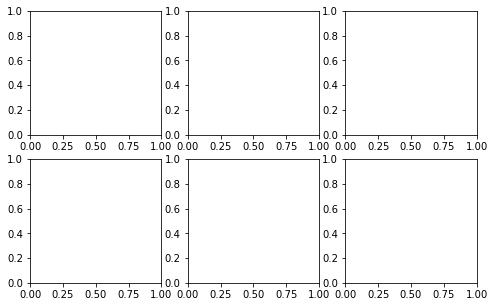

In [2]:
fit, axes = plt.subplots(2, 3, figsize = (8, 5))
plt.show()

The first of the plt.subplots() parameters specifies the number of rows and the second the number of columns. The graph looks a bit frustrating. In this case, you can use <b>plt.tight_layout()</b> to solve the frustration.

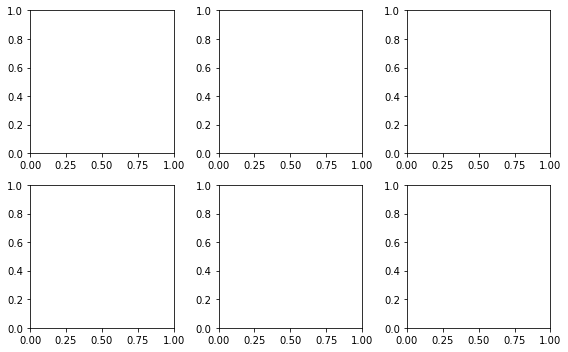

In [3]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
plt.tight_layout()
plt.show()

But should it be the same size depending on the subplot? For example, bar graphs and pie charts are often very different in ratio.

In this case, the layout should be different.

In this case, you can easily use the grid system using <b>plt.subplot2grid</b>. If you're a front-end developer, it may be easier to understand.

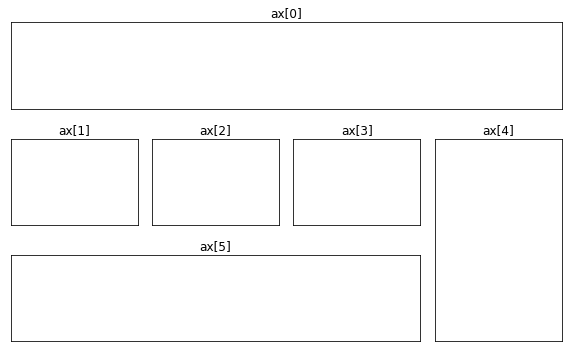

In [4]:
# with subplot2grid

fig = plt.figure(figsize = (8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3, 4), (0, 0), colspan = 4)
ax[1] = plt.subplot2grid((3, 4), (1, 0), colspan = 1)
ax[2] = plt.subplot2grid((3, 4), (1, 1), colspan = 1)
ax[3] = plt.subplot2grid((3, 4), (1, 2), colspan = 1)
ax[4] = plt.subplot2grid((3, 4), (1, 3), colspan = 1, rowspan = 2)
ax[5] = plt.subplot2grid((3, 4), (2, 0), colspan = 3)

for ix in range(6):
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

Alternatively, you can use <b>plt.add_axes()</b> to create an ax where you want.

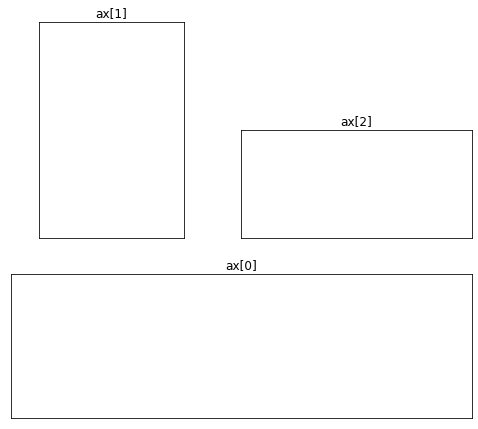

In [5]:
fig = plt.figure(figsize = (8, 5))

ax = [None for _ in range(3)]

ax[0] = fig.add_axes([0.1, 0.1, 0.8, 0.4]) # x, y, dx, dy -> 시작위치 x, y / 길이 dx, dy
ax[1] = fig.add_axes([0.15, 0.6, 0.25, 0.6])
ax[2] = fig.add_axes([0.5, 0.6, 0.4, 0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])
    
plt.show()

Another way is to use gridspec. This allows you to use <b>add_subplot</b> together, similar to subplots to grid.

This approach allows you to take advantage of the concept of list to use a developer-friendly grid.

In [6]:
test = [i for i in range(10)]
test[-1]

9

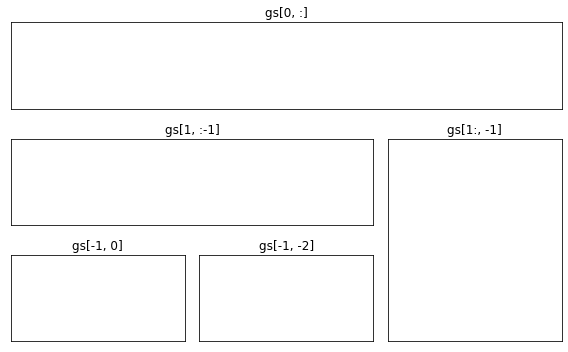

In [7]:
fig = plt.figure(figsize = (8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :])
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])
    
plt.tight_layout()
plt.show()

Here you can change the color of ax of plt itself, such as facecolor, to make it look more dashboard-like.

### 2. Colormap
[How to Choose Colors for Yours Data Visualizations](https://medium.com/nightingale/how-to-choose-the-colors-for-your-data-visualizations-50b2557fa335)
- Qualitative palettes : 카테고리형 데이터를 분류할 때는 확실하게 구분되는 원색들로 색을 구성해야함. 이때 분류 집단의 수가 10개 이상 넘어가면 구분하기 어렵기 때문에 소수의 집단은 other로 묶어서 분류해야함. 두 가지 데이터를 표현할 때는 색을 다르게 하거나 명도나 saturation을 구분하자.
- Sequential palette : numeric or ordered 데이터를 분휴할 때는 sequential palette를 사용하자. 상대적으로 낮은 value를 가지고 있으면 조금 더 밝게 표시!
- Diverging palette : numeric 데이터에서 어느 한 지점을 통해 두 집단으로 분류할 때 사용함. 두 가지 색을 가지고 표현함.
- 더 읽어봐야함

Color is very important in the graph. Of course the matplotlib team has already created a good color palette, and we just need to use it.

This time, I'll show you the color palette in matplotlib and which graph to use.
- diverging
- qualitative
- sequential
- scientific

### Diverging Colormap
This colormap is usually used in visualizations where the median is obvious.

It is usually visualized on a white background, white in the center, and darker in color toward both ends. In other words, the lighter the value, the closer to the center, the darker, the closer to end.

Useful for expressing bias, such as correlation and political disposition.

Currently it is a continuous colormap, but you can also use discrete colorpalette depending on the interval.

matplotlib loads the library's palette with that element in the cmap parameter. You can, of course, make it custom.

In [26]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list
    
    n = len(cmaps)
    
    fig = plt.figure(figsize = (8.25, n*0.2), dpi = 200)
    ax = plt.subplot(1, 1, 1, frameon = False, xlim = [0, 10], xticks = [], yticks = [])
    fig.subplots_adjust(top = 0.99, bottom = 0.01, left = 0.18, right = 0.99)
    
    y, dy, pad = 0, 0.3, 0.08
    
    ticks, labels = [], []
    
    for cmap in cmaps[::-1]:
        Z = np.linspace(0, 1, 512).reshape(1, 512)
        plt.imshow(Z, extent = [0, 10, y, y+dy], cmap = plt.get_cmap(cmap)) # extend = [left, right, bottom, top] 길이
        ticks.append(y+dy / 2)
        labels.append(cmap)
        y = y + dy + pad
    
    ax.set_ylim(-pad, y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    
    ax.tick_params(axis = 'y', which = 'both', length = 0, labelsize = 5)
    plt.title(f'{ctype} Colormap', fontweight = 'bold', fontsize = 8)
    plt.show()

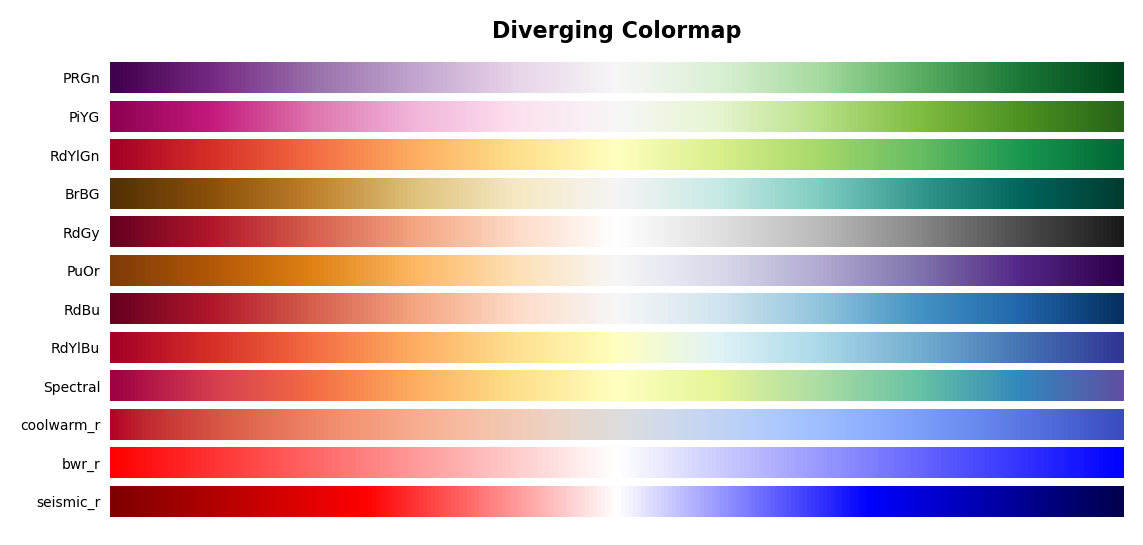

In [27]:
# _r mean reverse
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',
               'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

### Qualitative Colormap
A palette of independent colors, often used for categorical variables.

It is recommended to organize up to 10 colors, and to group more and smaller categories with other.

Repeating colors can be confusing, so try to avoid overlapping as much as possible. It's good idea to change color to color rather than saturation and brightness.

Personally, I like Set2 palette.

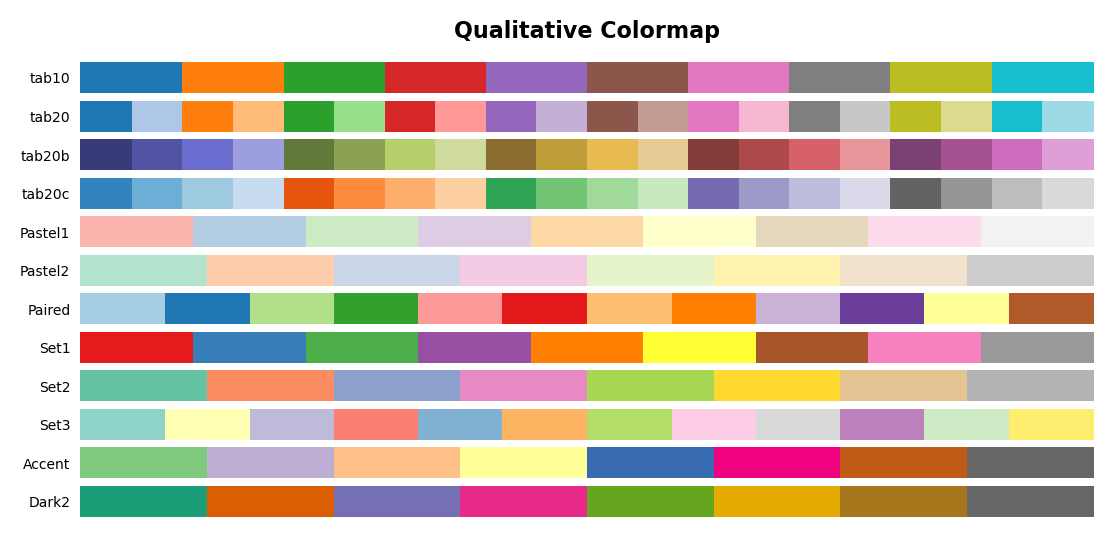

In [36]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
                   'Pastel1', 'Pastel2', 'Paired',
                   'Set1', 'Set2', 'Set3', 'Accent', 'Dark2')

cmap_plot(qualitative_cmap, 'Qualitative')

Personally, I like to use this palette when visualizing after dimension reduction such as t-sne.

### Sequential Colormap
This palette is appropriate for variables with numbers or sorted values.

Used a lot in comparison of figures. Especially effective for expressing density. Take advantage of map graphs for better visualization.

Similar to diverging, but with a slightly different part because each endpoint is a color criterion, not the median. It usually indeicates that light values are dark on dark backgrounds and dark values on light backgrounds.

It is recommended to use a single hue for the color.

Like diverging, it can also be used in discrete form.

<b> _r means 'reverse'.</b>

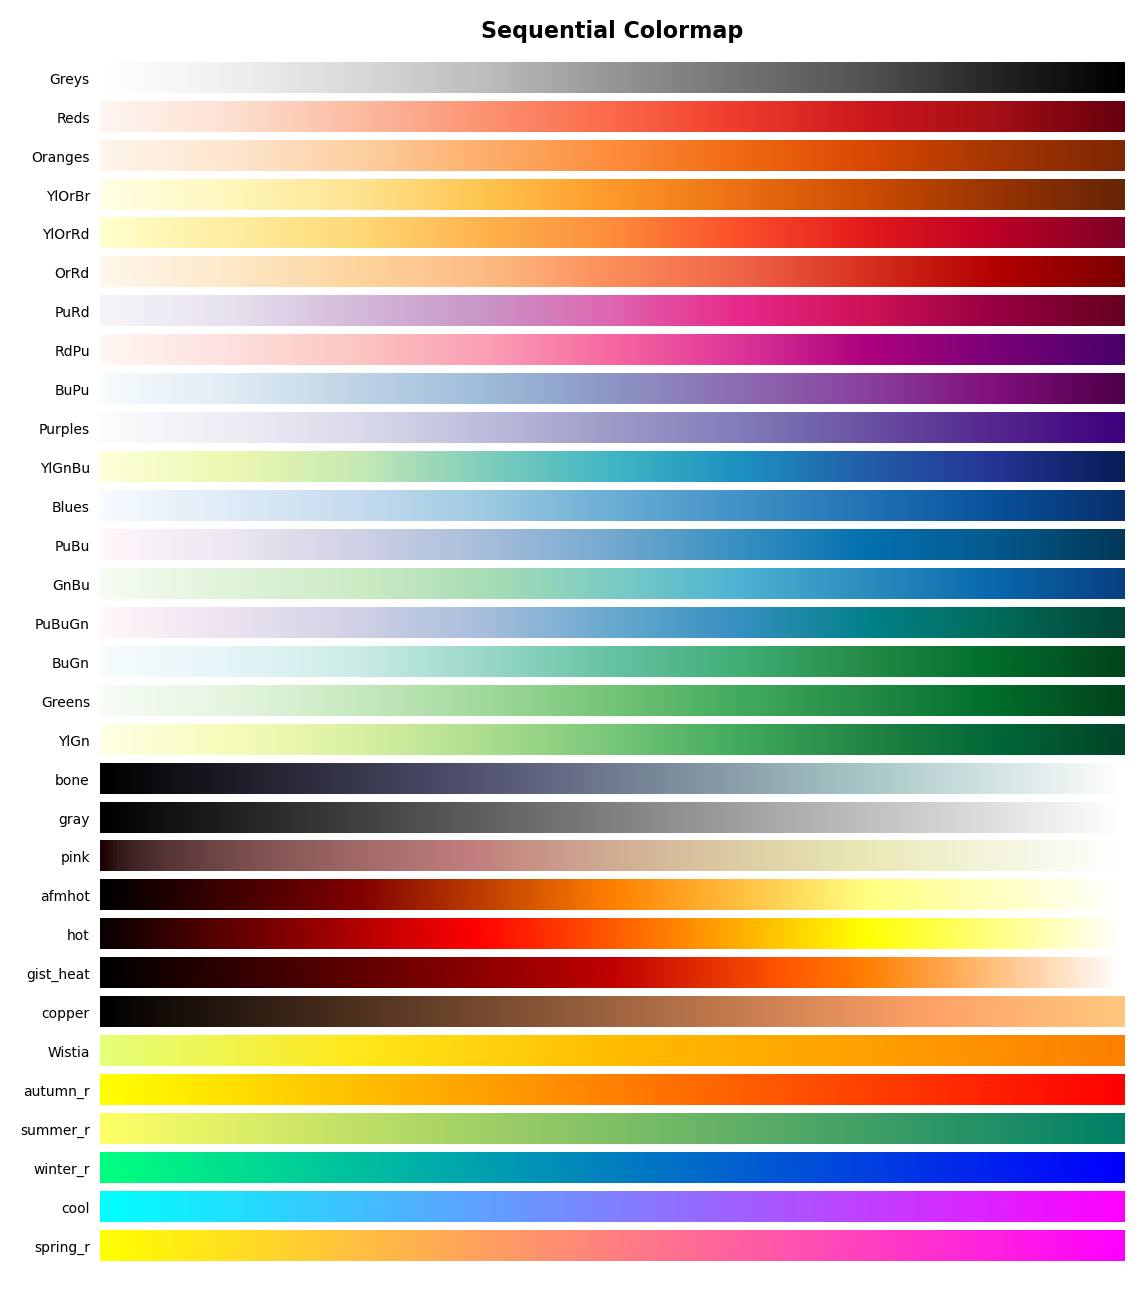

In [38]:
sequential_cmap = ('Greys', 'Reds', 'Oranges',
                  'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                  'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
                  'Greens', 'YlGn', 'bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat',
                  'copper', 'Wistia', 'autumn_r', 'summer_r', 'winter_r', 'cool', 'spring_r')

cmap_plot(sequential_cmap, 'Sequential')

It can be used to give a gradual feeling or to check the emphasis of a particular part.

### Scientific Colormap
I don't know why, but it's used a lot in scientific visualization. It is used as a basic colormap of plotly and has high utilization and relatively professional feel. 

I've seen it often used in signal data like spectrograms when dealing with voice data.

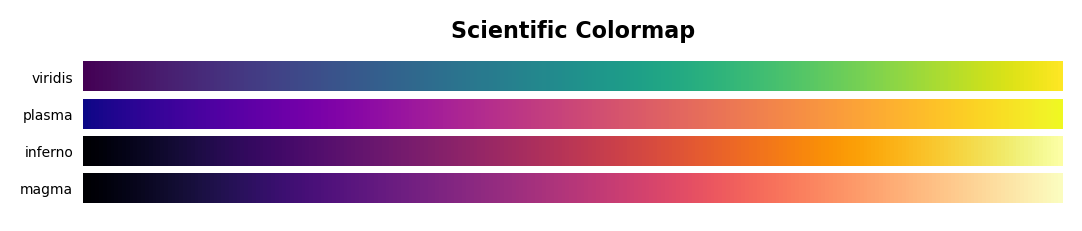

In [39]:
scientific_cmap = ['viridis', 'plasma', 'inferno', 'magma']
cmap_plot(scientific_cmap, 'Scientific')